# 多層パーセプトロン

<img src="img/ffnn.png" width=500>

## 誤差逆伝播法
### ①与えられた入力をその時点での重みを用いて順伝播させ,出力yを得る．
### ②得られた出力を元に，誤差を計算し，最終出力層での重みの勾配を計算．
### ③同様に，l+1層目の情報を用いてl層目の重みの勾配を計算
### ④各層の重みの更新
### ⑤①から④を繰り返す

#### ②について
最終出力層$L$での重みの勾配は誤差関数を$E_n$,最終出力データ$y$,正解データを$\boldsymbol d$とすると

(例として，最終層の活性化関数を恒等写像にして，誤差関数を二乗誤差とする)
#### $$\begin{align}
\frac{\partial E_n}{\partial w_{ji}^{(L)}}&=\frac{\partial E_n}{\partial y}\frac{\partial y}{\partial w_{ji}^{(L-1)}}\\
&=(\boldsymbol y(\boldsymbol x)-\boldsymbol d)^T\frac{\partial y}{\partial w_{ji}^{(L-1)}}\\
&=(\boldsymbol y(\boldsymbol x)-\boldsymbol d)^T\boldsymbol z_i^{(L-1)}
\end{align}\tag{1}$$
となります．
#### ③について
$l$層での$j$番目のユニットへの入力を$u_j^{(l)}$とすると，l層での重みの勾配は，l+1層の情報を用いて次のように記述されます．
#### $$\begin{align}
\frac{\partial E_n}{\partial w_{ji}^{(l)}}&=\frac{\partial E_n}{\partial u_j^{(l)}}\frac{\partial u_j^{(l)}}{\partial w_{ji}^{(L-1)}}\\
&=\bigl(f^{'}(u_j^{(l)})\sum_{k}w_{kj}^{(l+1)}(u_k^{(l+1)}-d_k)\bigr)\frac{\partial u_j^{(l)}}{\partial w_{ji}^{(l)}}\\
&=\bigl(f^{'}(u_j^{(l)})\sum_{k}w_{kj}^{(l+1)}(u_k^{(l+1)}-d_k)\bigr)\boldsymbol z_i^{(l-1)}
\end{align}\tag{2}$$
#### ④について
重みの更新は以下の式で行います
#### $$w^{(l)}:=w^{(l)}-\varepsilon \frac{\partial E_n}{\partial w^{(l)}}\tag{3}$$

## MNIST

### 必要なライブラリのインポート

In [1]:
from sklearn.metrics import f1_score
import numpy as np
from sklearn.utils import shuffle

In [3]:
from keras.datasets import mnist

#テストデータと教師データのデータとindexを取得
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), -1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), -1))  # adapt this if using `channels_first` image data format

Using TensorFlow backend.


In [4]:
print(X_train.shape)
print(X_test .shape)
print(X_train.shape)
print(X_test .shape)

(60000, 784)
(10000, 784)
(60000, 784)
(10000, 784)


In [5]:
#MNISTを分類するクラス
#適切に編集してください

class MLP_MNIST(object):
        def __init__(self):
            pass
        
        def fit(self,x,t):
            

            self.numInput = x.shape[1]  #入力次元
            self.numHidden = 200  #隠れ層次元
            self.numOutput = 10 #出力層次元
            
            # 入力層-隠れ層間の重み初期値
            self.W1 = np.random.uniform(low=-0.08, high=0.08, size=(self.numInput, self.numHidden)).astype('float32')  
            self.b1 = np.zeros(self.numHidden).astype('float32')

            # 隠れ層-出力層間の重み初期値
            self.W2 = np.random.uniform(low=-0.08, high=0.08, size=(self.numHidden, self.numOutput)).astype('float32')
            self.b2 = np.zeros(self.numOutput).astype('float32')
            
            #one-hotベクトルに変換
            t= self.onehot(t)
            
            
            """#通常の学習
            #epoch数、学習を行う
            epoch_number=10000
            for epoch in range(epoch_number):
                if epoch%1000==1:
                        print(epoch)
                        print(self.cost)
                self.train(x, t)
            """
            
            #バッチ学習
            epoch_number=25
            batch_size = 10
            n_batches = x.shape[0] // batch_size
            random_state=42
            
            for epoch in range(epoch_number):
                x, t = shuffle(x, t, random_state=random_state)
                for i in range(n_batches):
                    start = i * batch_size
                    end = start + batch_size
                
                    self.train(x[start:end], t[start:end])
                if epoch%10==1:
                        print("EPOCH",epoch)
                        print("cost",self.cost)
            
            
            
        def train(self, x, t,eps=0.01):
            
            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=sigmoid(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = softmax(u2)
        
            # 誤差（Cross Entropy）
            self.cost =  -np.mean(np.sum(t*np.log(y)))
            
            
            #Back Propagation
            
            #deltaの計算
            delta_2 = y - t # Layer2 delta
            delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta
            
            #誤差を各重みで偏微分
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        

            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
            
            # 重みの更新
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
           
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2      
              
        def predict(self,x):
            
            # Feed Forward Propagtion
            u1=np.matmul(x,self.W1)+self.b1
            z1=sigmoid(u1)
            u2=np.matmul(z1,self.W2)+self.b2
            y = softmax(u2)
            
            return  y.argmax(axis=1)


        def onehot(self,y):
            """train_yをonehotに変換"""
            Z = np.zeros((len(y), self.numOutput))
            Z[np.arange(len(y)), y] = 1
            return Z

In [6]:
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))

# モデルの学習

In [7]:
model = MLP_MNIST()
model.fit(X_train,y_train)

EPOCH 1
cost 0.463044172912
EPOCH 11
cost 3.73241537911
EPOCH 21
cost 0.061044189067


In [11]:
pred=model.predict(X_test)

In [12]:
f1_score(y_test, pred, average='macro')

0.97993195145806988

## $f(x)=x+0.3\sin(2\pi x)$ に沿って生成したノイズを含むデータ点から，近似曲線を推定する

<img src="img/neuron.png" width=500>

### 必要なライブラリのインポート 

In [9]:
import pylab as plt
import numpy as np

### データの作成

In [10]:
def create_toy_dataset(func, n=100):
    #サイズ(n,1)の配列に0~1の乱数を格納
    x = np.random.uniform(size=(n, 1))
    #関数の返り値にノイズを発生
    t = func(x) + np.random.uniform(-0.1, 0.1, size=(n, 1))
    return x, t

#f(x)=x+0.3sin(2πx)を定義
def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

In [11]:
#学習データ
x, t = create_toy_dataset(func)

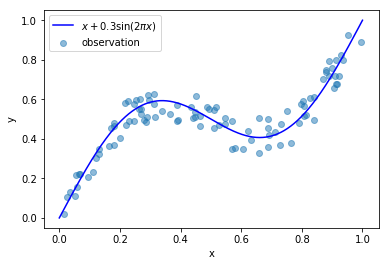

In [12]:
#観測データと正解の関数

plt.scatter(x, t, alpha=0.5, label="observation")
x_test = np.linspace(0, 1, 1000)[:, np.newaxis]
plt.plot(x_test, func(x_test), color="blue", label="$x+0.3\sin(2\pi x)$")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 多層パーセプトロンによる回帰

In [11]:
#回帰を行うクラス
#適切に編集してください

class MLP_regression(object):
    def __init__(self):
        pass
        
    def fit(self,x,t):
        self.numInput = x.shape[1]  #入力次元
        self.numHidden = 3  #隠れ層次元
        self.numOutput = 1 #出力層次元
            
        # 入力層-隠れ層間の重み初期値
        self.W1 = np.random.uniform(low=-2, high=2, size=(self.numInput, self.numHidden)).astype('float32')  
        self.b1 = np.ones(self.numHidden) * 0.5
        
        # 隠れ層-出力層間の重み初期値
        self.W2 = np.random.uniform(low=-2, high=2, size=(self.numHidden, self.numOutput)).astype('float32')
        self.b2 = np.ones(self.numOutput) * 0.5
        
        #通常の学習
        #epoch数、学習を行う
        epoch_number=100000
        for epoch in range(epoch_number):
            if epoch%10000==1:
                    print("EPOCH",epoch)
                    print("cost",self.cost)
            self.train(x, t)
            
    def train(self, x, t,eps=0.001):
            
            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=tanh(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = u2
        
            # 誤差（二乗誤差）
            self.cost =  0.5 * np.sum((y-t) ** 2)
           
            #Back Propagation
            #deltaの計算
            delta_2 = y - t # Layer2 delta
            delta_1 = deriv_tanh(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta
            
            #誤差を各重みで偏微分式(1)(2)
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        
            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
        
            # 重みの更新式(3)
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2 
        
        
    def predict(self,x):
        # Forward Propagation Layer1
        u1=np.matmul(x,self.W1)+self.b1
        z1=tanh(u1)
        # Forward Propagation Layer2
        u2=np.matmul(z1,self.W2)+self.b2
        y = u2
        return y


### 諸関数の定義

In [12]:
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))
def tanh(x):
        return np.tanh(x)
def deriv_tanh(x):
        return 1 - tanh(x) ** 2

### モデルの学習

In [13]:
#モデルのインスタンス
model=MLP_regression()

#モデルの学習
model.fit(x,t)

EPOCH 1
cost 278.05736078058897
EPOCH 10001
cost 0.9220494144788718
EPOCH 20001
cost 0.6863208477378449
EPOCH 30001
cost 0.20333019066670624
EPOCH 40001
cost 0.1746244154940572
EPOCH 50001
cost 0.16567713112118168
EPOCH 60001
cost 0.1626467471791585
EPOCH 70001
cost 0.16137461900439398
EPOCH 80001
cost 0.16064711185505673
EPOCH 90001
cost 0.1601234911799901


### データのプロット

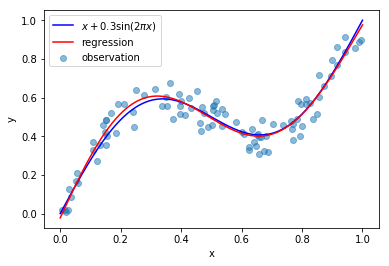

[[-2.01511602 -2.59524901  3.08274882]]
[ 1.12771065  2.35257507 -0.0552838 ]
[[ 1.79799788]
 [-1.80039869]
 [ 1.46135121]]
[0.36957912]


In [14]:
plt.scatter(x, t, alpha=0.5, label="observation")
x_test = np.linspace(0, 1, 1000)[:, np.newaxis]
y = model.predict(x_test)
plt.plot(x_test, func(x_test), color="blue", label="$x+0.3\sin(2\pi x)$")
plt.plot(x_test, y, color="red", label="regression")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(model.W1)
print(model.b1)
print(model.W2)
print(model.b2)

## 二値分類

In [15]:
def create_toy_dataset2():
    x = np.random.uniform(-1., 1., size=(1000, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)



In [16]:
#データ生成
x, labels = create_toy_dataset2()

(1000, 2)
(1000, 1)


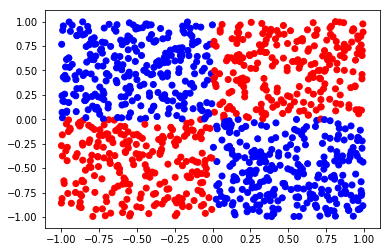

In [17]:
#可視化
print(x.shape)
print(labels.shape)
colors = ["blue", "red"]
plt.scatter(x[:, 0], x[:, 1], c=[colors[int(label)] for label in labels])
plt.show()

In [18]:
class MLP_binary(object):
    def __init__(self):
        pass
    
    def fit(self,x,t):
        self.numInput = x.shape[1]  #入力次元
        self.numHidden = 4  #隠れ層次元
        self.numOutput = 1 #出力層次元
            
        # 入力層-隠れ層間の重み初期値
        self.W1 = np.random.uniform(low=-2, high=2, size=(self.numInput, self.numHidden)).astype('float32')  
        self.b1 = np.ones(self.numHidden) * 0.5
        
        # 隠れ層-出力層間の重み初期値
        self.W2 = np.random.uniform(low=-2, high=2, size=(self.numHidden, self.numOutput)).astype('float32')
        self.b2 = np.ones(self.numOutput) * 0.5
        
        #通常の学習
        #epoch数、学習を行う
        epoch_number=1000
        for epoch in range(epoch_number):
            if epoch%1000==1:
                    print("EPOCH",epoch)
                    print("cost",self.cost)
            self.train(x, t)
            
    def train(self, x, t,eps=0.001):

            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=tanh(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = sigmoid(u2)
        
            
            # 誤差（二乗誤差）
            self.cost =  np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
           
            #Back Propagation
            #deltaの計算
            delta_2 = y - t # Layer2 delta

            delta_1 = deriv_tanh(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta

            
            
            #誤差を各重みで偏微分
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        
            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
        
            # 重みの更新
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2 
        
        
    def predict(self,x):
        # Forward Propagation Layer1
        u1=np.matmul(x,self.W1)+self.b1
        z1=tanh(u1)
        # Forward Propagation Layer2
        u2=np.matmul(z1,self.W2)+self.b2
        y = sigmoid(u2)
        return y
    
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))
def tanh(x):
        return np.tanh(x)
def deriv_tanh(x):
        return 1 - tanh(x) ** 2

In [19]:
model=MLP_binary()
model.fit(x,labels)


EPOCH 1
cost 1230.901330447953


In [20]:
X_test, Y_test = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x_test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)

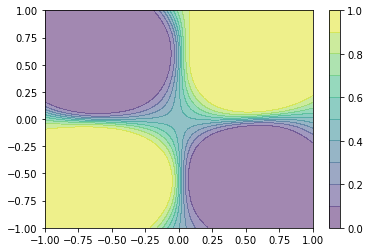

In [21]:
probs = model.predict(x_test)
Probs = probs.reshape(100, 100)
levels = np.linspace(0, 1, 11)
plt.contourf(X_test, Y_test, Probs, levels, alpha=0.5)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# おまけ
## 活性化関数と活性化関数の微分の可視化

In [22]:
import matplotlib.pyplot as plt

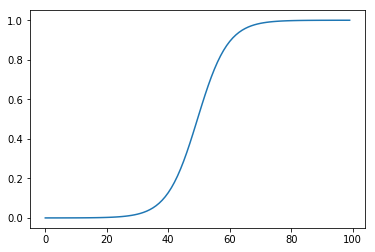

In [23]:
x = np.linspace(-10,10,100)
plt.plot(sigmoid(x))
plt.show()

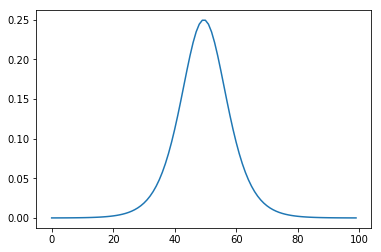

In [24]:
x = np.linspace(-10,10,100)
plt.plot(deriv_sigmoid(x))
plt.show()

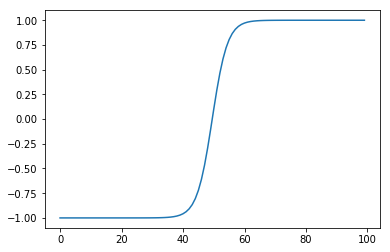

In [25]:
x = np.linspace(-10,10,100)
plt.plot(tanh(x))
plt.show()

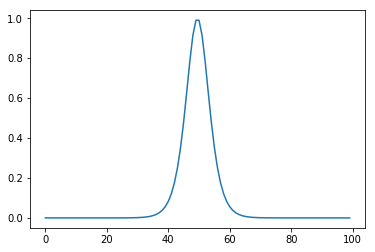

In [26]:
x = np.linspace(-10,10,100)
plt.plot(deriv_tanh(x))
plt.show()